In [3]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from implementations import *



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive/My Drive/ML/ML2020/source

/content/drive/My Drive/ML/ML2020/source


# Load the data and clean the data

In [4]:
from proj1_helpers import *
path = '../data/train.csv'
y, tx,ids = load_csv_data(path)


In [ ]:
degree = 7
method = 'mean'
tx = pre_process(tx,method,degree)
if True in np.isnan(tx):
    print('fail')
tx.shape

(250000, 23)

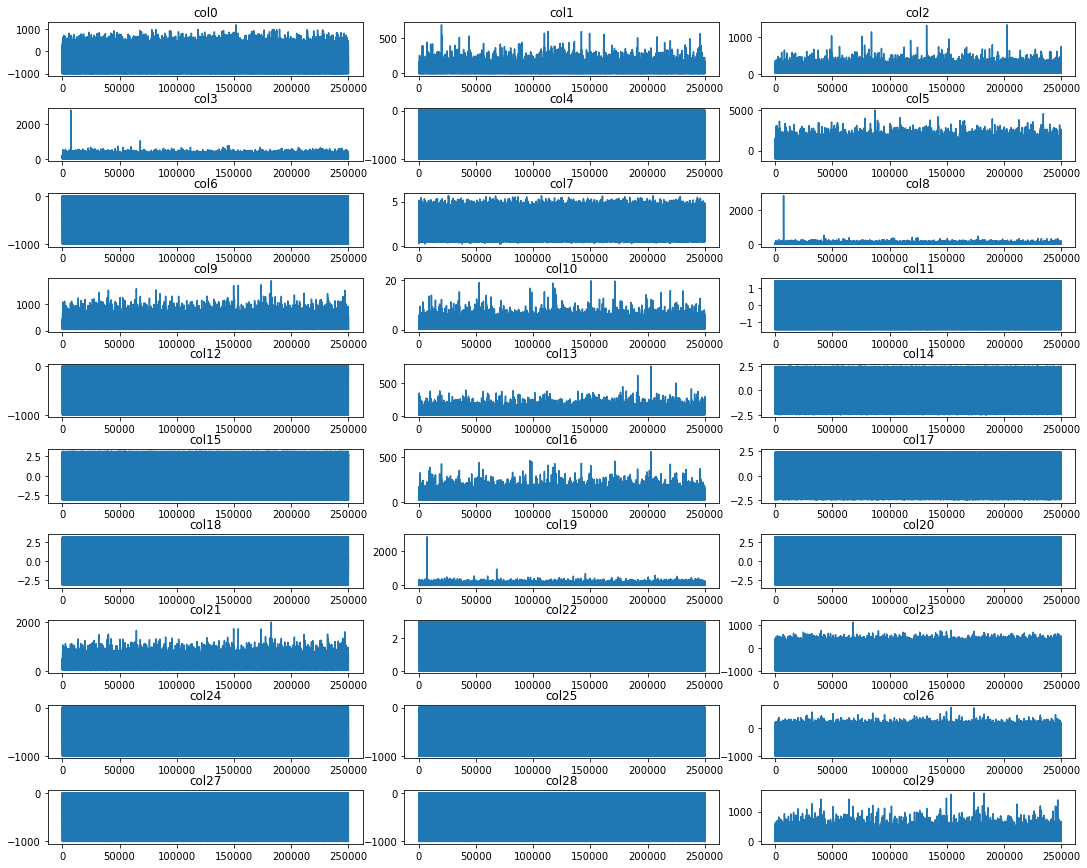

In [ ]:
fig, axs = plt.subplots(nrows=10, ncols=3, figsize=(15, 12))
cols = np.linspace(0,30,31,dtype=int)
fig.tight_layout()
for ax, col in zip(axs.flat, cols):
    ax.plot(tx[:,col])
    ax.title.set_text('col{}'.format(col))

By looking at this graph, we can see that some columns have some outliers. I think that we could delete them to increase a bit the models. In addition, column [4,6,12,24,25,27,28] can be removed because there are full of -999 (maybe not).

In [ ]:
degree = 1
method = 'mean'
tx = pre_process(tx,method,degree)
if True in np.isnan(tx):
    print('fail')
tx.shape

(250000, 47)

# Grid search

In [ ]:
# initialisation
y, tx,ids = load_csv_data(path)
lambdas = [100,25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01,0.001,0.0001,0.00001,0.000001]
degrees = np.linspace(1,16,16,dtype='int')
gammas = [1e-6]
ratio = 0.8
method = 'mean'

# grid_search() return a list best_model = [best_lambda,best_degree,best_acc] where best_lambda is best gamma for GD and SGD

## Least-square

In [ ]:
best_model = grid_search(lambdas,ratio,degrees,gammas,method,tx,y,'ls')

[100, 4, 0.7993]


## Logistic regression


In [ ]:
grid_search(lambdas,ratio,degrees,gammas,method,tx,y,'logistic')

[1e-06, 8, 0.6685]


[1e-06, 8, 0.6685]

## Regularized logistic regression

In [ ]:
grid_search(lambdas,ratio,degrees,gammas,method,tx,y,'reg_logistic')

## Least-square GD

In [ ]:
# Will take a lot of time to compute
grid_search(lambdas,ratio,degrees,gammas,method,tx,y,'lsGD')

## Least-square SGD

In [ ]:
# Will take a lot of time to compute
grid_search(lambdas,ratio,degrees,gammas,method,tx,y,'lsSGD')

## Ridge

In [ ]:
best_model = grid_search(lambdas,ratio,degrees,gammas,method,tx,y,'ridge')
#cross_validation(y, tx, 5, 0.0001, 6, seed=1, method="ridge")
#tx_opt = pre_process(tx,method,best_model[1])
#w_ridge,loss_ridge = ridge_regression(y,tx_opt,best_model[0])

[1e-06, 4, 0.7996]


# Train the best Model

In [ ]:
tx_opt = pre_process(tx,method,7)
w_ridge,loss_ridge = ridge_regression(y,tx_opt,0.0001)
################# Current best 0.821 ########################

## Logistic regression


In [ ]:
best_model = grid_search(lambdas,ratio,[1,2,3,4],gammas,method,tx,y,'logistic')

D:\OneDrive\Documents\EPFL\Master_3\Machine Learning\ML2020\source\implementations.py:82: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-x))


## Least-square GD

In [ ]:
degrees = [1]

In [ ]:
# Will take a lot of time to compute
best_model = grid_search(lambdas,ratio,degrees,gammas,method,tx,y,'lsGD',True)
tx_opt = pre_process(tx,method,best_model[1])
max_iters = 10000
initial_w = np.zeros(tx_opt.shape[1])
w_lsGD,loss_lsGD = least_squares_GD(y,tx_opt, initial_w, max_iters,best_model[0])

degree = 1, gamma = 0.001
acc = 0.64224
####################################
degree = 1, gamma = 0.01
acc = 0.61888
####################################
degree = 1, gamma = 0.1
acc = 0.68596
####################################
-----------------------------------------
degree= 1 ,acc = 0.68596
-----------------------------------------
[0.1, 1, 0.68596]


## Least-square SGD

In [ ]:
# Will take a lot of time to compute
gammas = [0.0001,0.001,0.01,0.1]
best_model = grid_search(lambdas,ratio,degrees,gammas,method,tx,y,'lsSGD',True)
tx_opt = pre_process(tx,method,best_model[1])
max_iters = 10000
initial_w = np.zeros(tx_opt.shape[1])
w_lsSGD,loss_lsSGD = least_squares_SGD(y,tx_opt, initial_w, max_iters,best_model[0])

degree = 1, gamma = 0.0001
acc = 0.61872
####################################
degree = 1, gamma = 0.001
acc = 0.68404
####################################
degree = 1, gamma = 0.01
acc = 0.73028
####################################
degree = 1, gamma = 0.1
acc = 0.73236
####################################
-----------------------------------------
degree= 1 ,acc = 0.73236
-----------------------------------------
[0.1, 1, 0.73236]


In [ ]:
%rm *.png

# CROSS CORR-RIDGE-NORMAL EQ

In [5]:
from proj1_helpers import *
from implementations import *

path = '../data/train.csv'
y, tx,ids = load_csv_data(path)

/content/drive/My Drive/ML/ML2020/source/implementations.py:95: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w=np.linalg.lstsq(tx.T@tx+lambda_*E,tx.T@y)[0]


<Figure size 432x288 with 0 Axes>

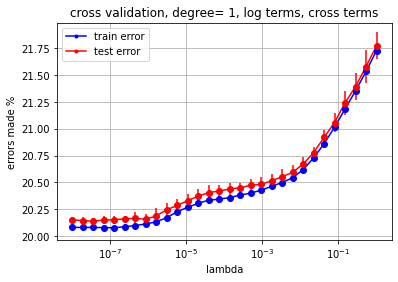

/content/drive/My Drive/ML/ML2020/source/implementations.py:95: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w=np.linalg.lstsq(tx.T@tx+lambda_*E,tx.T@y)[0]


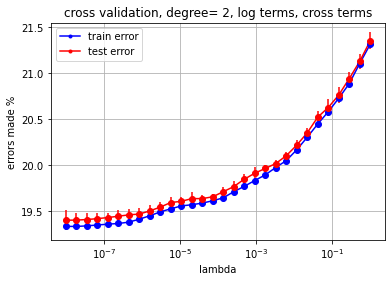

/content/drive/My Drive/ML/ML2020/source/implementations.py:95: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w=np.linalg.lstsq(tx.T@tx+lambda_*E,tx.T@y)[0]


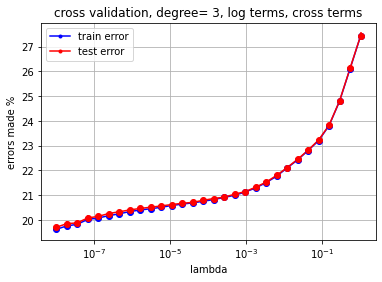

/content/drive/My Drive/ML/ML2020/source/implementations.py:95: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w=np.linalg.lstsq(tx.T@tx+lambda_*E,tx.T@y)[0]


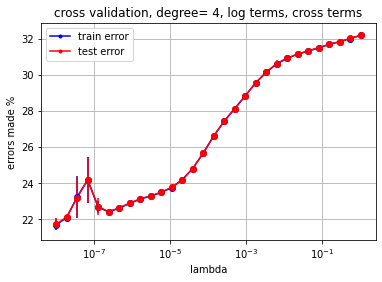

/content/drive/My Drive/ML/ML2020/source/implementations.py:95: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w=np.linalg.lstsq(tx.T@tx+lambda_*E,tx.T@y)[0]


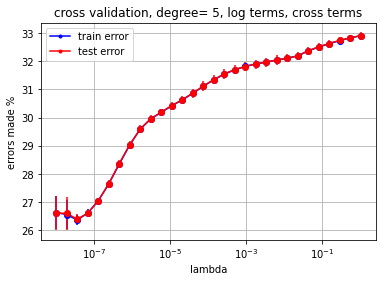

/content/drive/My Drive/ML/ML2020/source/implementations.py:95: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w=np.linalg.lstsq(tx.T@tx+lambda_*E,tx.T@y)[0]


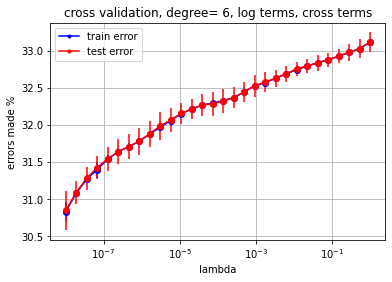

/content/drive/My Drive/ML/ML2020/source/implementations.py:95: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w=np.linalg.lstsq(tx.T@tx+lambda_*E,tx.T@y)[0]


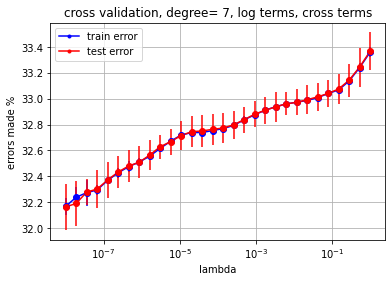

/content/drive/My Drive/ML/ML2020/source/implementations.py:95: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w=np.linalg.lstsq(tx.T@tx+lambda_*E,tx.T@y)[0]


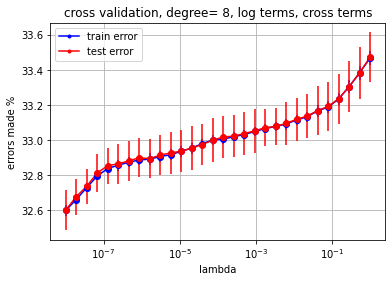

/content/drive/My Drive/ML/ML2020/source/implementations.py:95: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w=np.linalg.lstsq(tx.T@tx+lambda_*E,tx.T@y)[0]


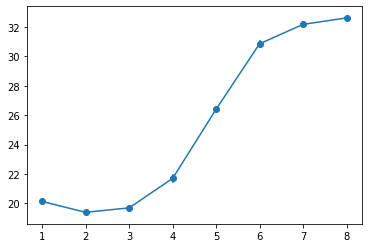

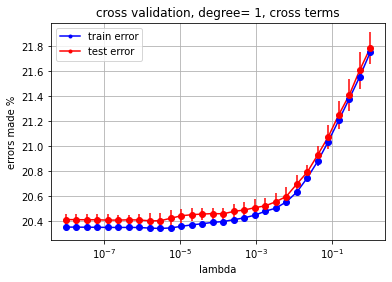

/content/drive/My Drive/ML/ML2020/source/implementations.py:95: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w=np.linalg.lstsq(tx.T@tx+lambda_*E,tx.T@y)[0]


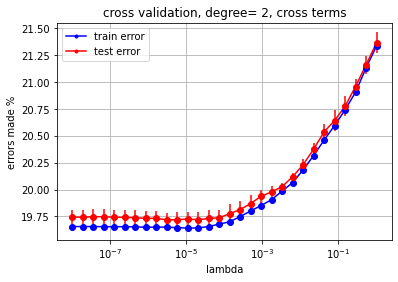

/content/drive/My Drive/ML/ML2020/source/implementations.py:95: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w=np.linalg.lstsq(tx.T@tx+lambda_*E,tx.T@y)[0]


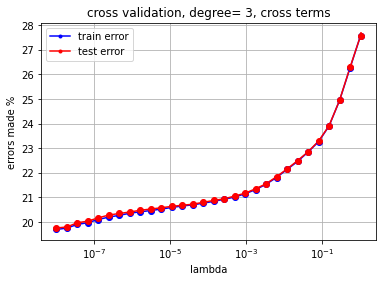

/content/drive/My Drive/ML/ML2020/source/implementations.py:95: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w=np.linalg.lstsq(tx.T@tx+lambda_*E,tx.T@y)[0]


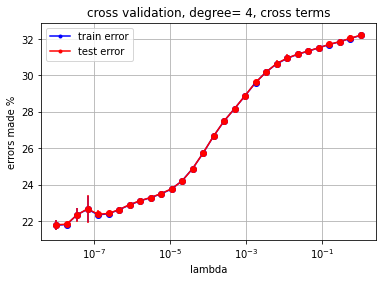

/content/drive/My Drive/ML/ML2020/source/implementations.py:95: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w=np.linalg.lstsq(tx.T@tx+lambda_*E,tx.T@y)[0]


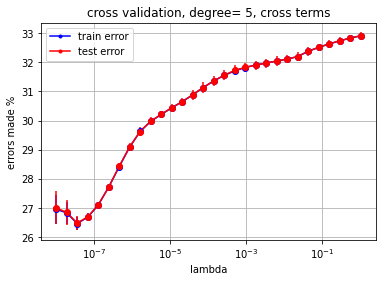

/content/drive/My Drive/ML/ML2020/source/implementations.py:95: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w=np.linalg.lstsq(tx.T@tx+lambda_*E,tx.T@y)[0]


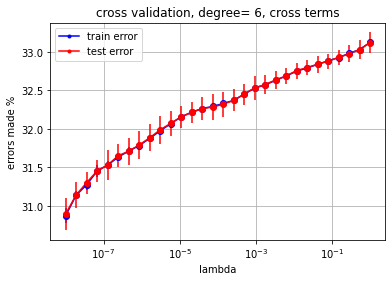

/content/drive/My Drive/ML/ML2020/source/implementations.py:95: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w=np.linalg.lstsq(tx.T@tx+lambda_*E,tx.T@y)[0]


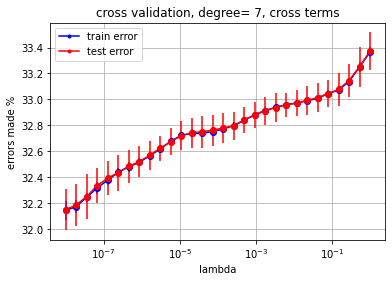

/content/drive/My Drive/ML/ML2020/source/implementations.py:95: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w=np.linalg.lstsq(tx.T@tx+lambda_*E,tx.T@y)[0]


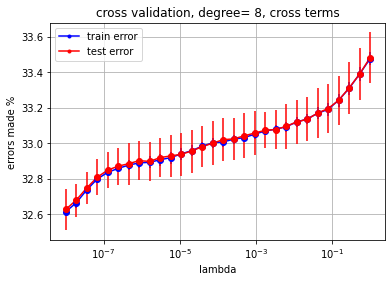

/content/drive/My Drive/ML/ML2020/source/implementations.py:95: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w=np.linalg.lstsq(tx.T@tx+lambda_*E,tx.T@y)[0]


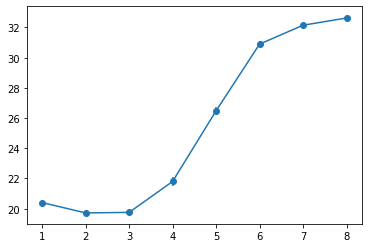

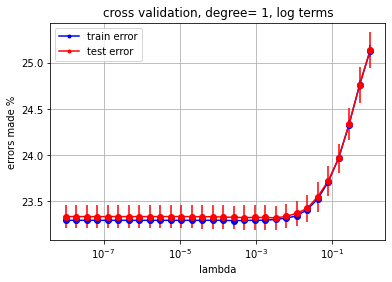

/content/drive/My Drive/ML/ML2020/source/implementations.py:95: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w=np.linalg.lstsq(tx.T@tx+lambda_*E,tx.T@y)[0]


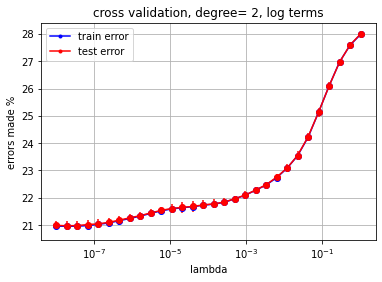

/content/drive/My Drive/ML/ML2020/source/implementations.py:95: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w=np.linalg.lstsq(tx.T@tx+lambda_*E,tx.T@y)[0]


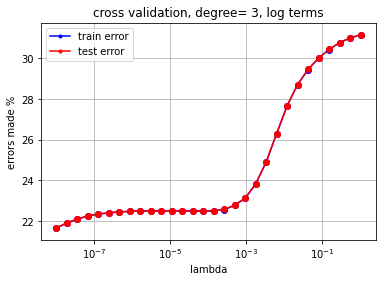

/content/drive/My Drive/ML/ML2020/source/implementations.py:95: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w=np.linalg.lstsq(tx.T@tx+lambda_*E,tx.T@y)[0]


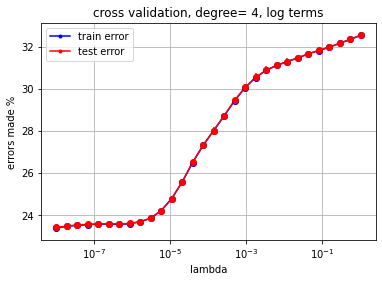

/content/drive/My Drive/ML/ML2020/source/implementations.py:95: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w=np.linalg.lstsq(tx.T@tx+lambda_*E,tx.T@y)[0]


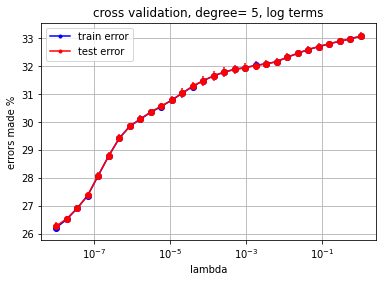

/content/drive/My Drive/ML/ML2020/source/implementations.py:95: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w=np.linalg.lstsq(tx.T@tx+lambda_*E,tx.T@y)[0]


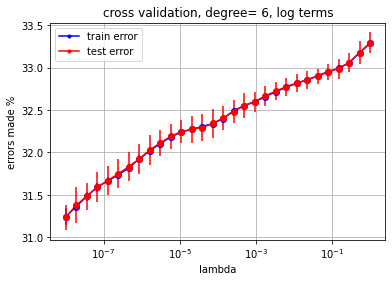

/content/drive/My Drive/ML/ML2020/source/implementations.py:95: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w=np.linalg.lstsq(tx.T@tx+lambda_*E,tx.T@y)[0]


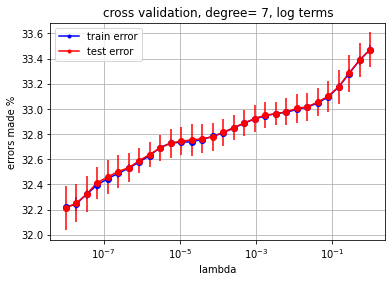

/content/drive/My Drive/ML/ML2020/source/implementations.py:95: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w=np.linalg.lstsq(tx.T@tx+lambda_*E,tx.T@y)[0]


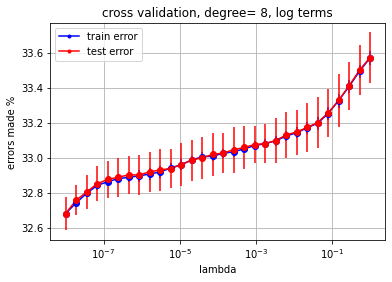

/content/drive/My Drive/ML/ML2020/source/implementations.py:95: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w=np.linalg.lstsq(tx.T@tx+lambda_*E,tx.T@y)[0]


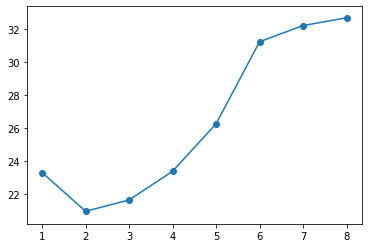

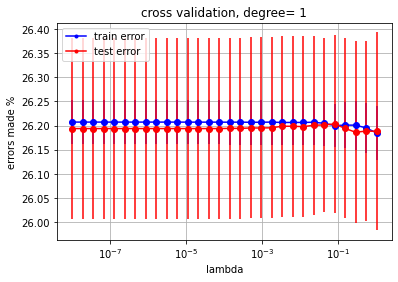

/content/drive/My Drive/ML/ML2020/source/implementations.py:95: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w=np.linalg.lstsq(tx.T@tx+lambda_*E,tx.T@y)[0]


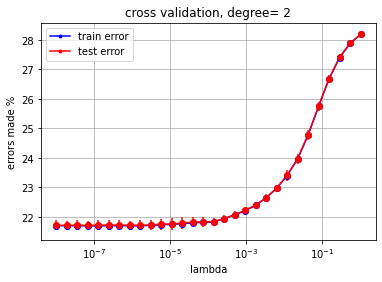

/content/drive/My Drive/ML/ML2020/source/implementations.py:95: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w=np.linalg.lstsq(tx.T@tx+lambda_*E,tx.T@y)[0]


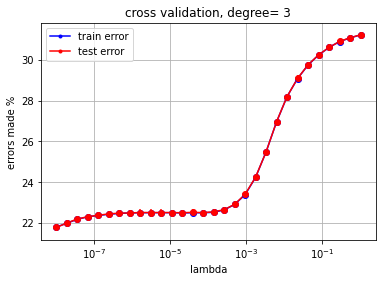

/content/drive/My Drive/ML/ML2020/source/implementations.py:95: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w=np.linalg.lstsq(tx.T@tx+lambda_*E,tx.T@y)[0]


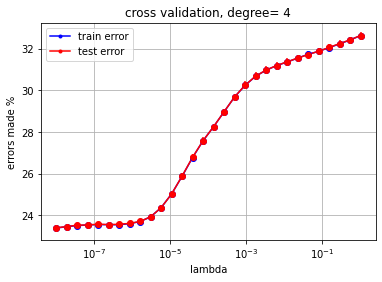

/content/drive/My Drive/ML/ML2020/source/implementations.py:95: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w=np.linalg.lstsq(tx.T@tx+lambda_*E,tx.T@y)[0]


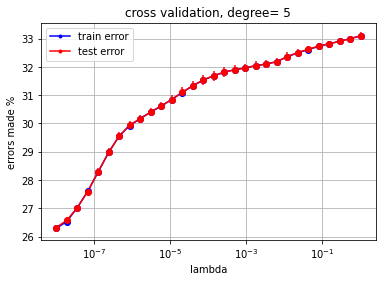

/content/drive/My Drive/ML/ML2020/source/implementations.py:95: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w=np.linalg.lstsq(tx.T@tx+lambda_*E,tx.T@y)[0]


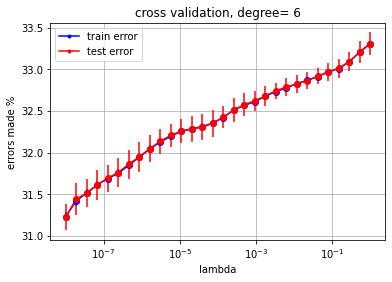

/content/drive/My Drive/ML/ML2020/source/implementations.py:95: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w=np.linalg.lstsq(tx.T@tx+lambda_*E,tx.T@y)[0]


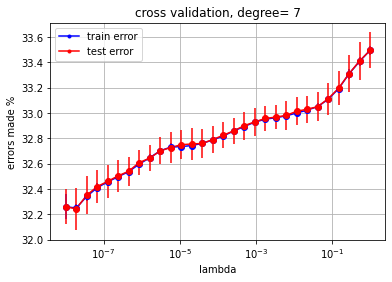

/content/drive/My Drive/ML/ML2020/source/implementations.py:95: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w=np.linalg.lstsq(tx.T@tx+lambda_*E,tx.T@y)[0]


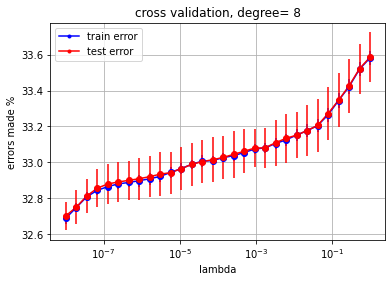

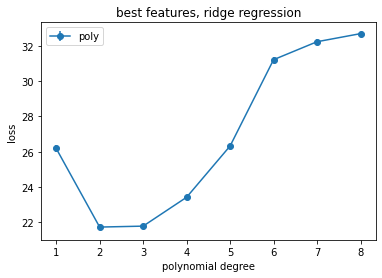

In [11]:
k_fold = 5
seed = 1

Features = ['true','false']
Lambdas = np.logspace(-8, 0, 30)
Degrees = np.arange(1,9)

cross_val_run(y, tx, Features, Degrees, Lambdas, k_fold, seed)


## Generate predictions and save ouput in csv format for submission:

In [13]:
%pwd

'/content/drive/My Drive/ML/ML2020/source'

In [ ]:
%cd /content/drive/My Drive/ML/ML2020/source

In [14]:
from proj1_helpers import *

# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload

%autoreload 2
from implementations import *



path = '../data/train.csv'
y, tx,ids = load_csv_data(path)

DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
y_test, tx_test, ids_test = load_csv_data(DATA_TEST_PATH)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
degree = 2
method = 'mean' #apply mean when standardizing data (pre_process)
cross='true' #add cross multiplications terms
log='true'

#pre_process train data 
tx = pre_process(tx,method,degree,cross,log)

# Have to apply the same data cleaning as for train set
tx_test = pre_process(tx_test,method,degree,cross,log)



In [18]:
lambda_=1e-8
#train model
w_trained,_=ridge_regression(y,tx,lambda_)
#test accuracy of predictions on itself (just to see if training went ok)
print('wrong: ', err_percent(y,tx,w_trained) , '%')

#predict y_pred on test data set
y_pred= tx_test@w_trained



/content/drive/My Drive/ML/ML2020/source/implementations.py:95: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w=np.linalg.lstsq(tx.T@tx+lambda_*E,tx.T@y)[0]


wrong:  19.3268 %


In [19]:


#predict y labels +1 or -1 with trained w
y_pred = predict_labels(w_trained, tx_test) 

OUTPUT_PATH = '../data/result.csv' # fill in desired name of output file for submission

create_csv_submission(ids_test, y_pred, OUTPUT_PATH) #save preds to output path
